# Bode plot for non-inverting OPA [gain 2] and [gain 11]

In [2]:
import pandas as pd
from utilities import * # My functions: pair_dat_err, uncertainties_to_root_graph_errors
from uncertainties import umath
import ROOT
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


# Gain 2

### Read DataFrames

In [4]:
df_data = pd.read_csv("../data-source/5-10-21/non_invertente/data.csv")
df_errors = pd.read_csv("../data-source/5-10-21/non_invertente/errors.csv")
df_errors.keys()

FileNotFoundError: [Errno 2] No such file or directory: '../data-source/5-10-21/non_invertente/data.csv'

### Convert to arrays of uncertainties

In [301]:
#index=[28,29]
#df_errors_n = df_errors.drop(index)
#df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data['f'], df_errors['f'])
ppch1_arr = pair_dat_err(df_data['PPch1'], df_errors['PPch1'])
ppch2_arr = pair_dat_err(df_data['PPch2'], df_errors['PPch2'])
fase_arr = df_data['fase']



### Calculate Gain

In [302]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log10(x), gains_arr))
gains_arr

array([1.78125+/-0.12767224215159545,
       1.883116883116883+/-0.1384522972169636,
       1.9803600654664484+/-0.14523855140968792,
       1.9572368421052633+/-0.14459885851098245,
       1.9572368421052633+/-0.14459885851098245,
       1.971830985915493+/-0.15569779827952537,
       1.9318181818181819+/-0.14125311835775145,
       1.8840579710144927+/-0.15456497003831432,
       1.8402777777777777+/-0.1454462836525921,
       1.7121212121212124+/-0.15020950790062446, 1.5+/-0.1325570321861761,
       1.3661971830985915+/-0.1192304630050715,
       1.2352941176470589+/-0.11686207686943165,
       0.9855072463768115+/-0.10173935062997987,
       0.6086956521739131+/-0.08483246388050573,
       0.3802816901408451+/-0.07534270587118803,
       0.2676056338028169+/-0.07290051507642514,
       0.1527777777777778+/-0.07025022274162865], dtype=object)

### Canvas

In [303]:
canvas = ROOT.TCanvas("c1", "bode gain 1", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [304]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 1")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit [TODO]

In [305]:
#function = "1/[0]*(1-1/[0]*exp(x/[0]))"



In [306]:
R1= 987
R2= 990
R3= 9700
G2 = 1+R2/R1
G11 = 1+R3/R1

R1_err = 1/100*R1 + 4*0.01*10**3
R2_err = 1/100*R2 + 4*0.01*10**3
R3_err = 1/100*R3 + 4*0.01*10**3
G2_err = np.sqrt((R2_err/R1)**2+(R1_err*R2/(R1**2))**2)
G11_err = np.sqrt((R3_err/R1)**2+(R1_err*R3/(R1**2))**2)
print(G2,'+-',G2_err)
print(G11,'+-',G11_err)
print(R1,'+-',R1_err)
print(R2,'+-',R2_err)
print(R3,'+-',R3_err)

G2_graph =1.9565217391304348 
G2_graph_err =0.04900999445669284
G11_graph =10.144927536231883
G11_graph_err =0.4222060504487371



2.0030395136778116 +- 0.07158589614427185
10.827760891590678 +- 0.5156008749851835
987 +- 49.870000000000005
990 +- 49.9
9700 +- 137.0


In [307]:
A_v2_d = 20*umath.log10(1+R2/R1)
#f_l2 = 1/np.sqrt(2)*(1+R2/R1)
print('guadagno calcolato = ',A_v2_d)
#print('freq taglio = ',f_l2)

guadagno calcolato =  6.033790332880712


In [308]:
function = "[1]*(1/sqrt(1+(x/([0]))**2))"
fit_f = ROOT.TF1("fit1", function)
###parameter per low pass filter
#fit_f.SetParName(0, "f_l2")
fit_f.SetParName(1, "Gain2")
#fit_f.SetParameter(0, 0.5*10**3)
#fit_f.SetParameter(1, A_v2_d)

#fit_f.SetParLimits(1,A_v2_d-1,A_v2_d+1)
#fit_f.SetParLimits(0,1e+05,1e+07)

In [309]:

fit_f.SetLineColor(4)

### Draw

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=98.2685 FROM MINOS     STATUS=SUCCESSFUL     14 CALLS         356 TOTAL
                     EDM=4.51853e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.78125e+05   4.31435e+04   4.89482e+02  -5.52157e-10
   2  Gain2        5.76186e+00   2.29851e-01   2.29851e-01  -2.62869e-06


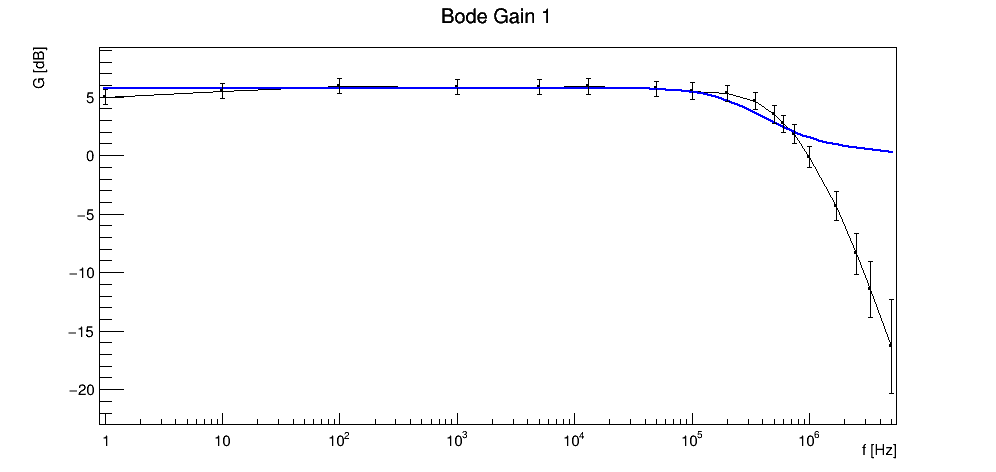

In [310]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f, "MSE")

In [311]:
###prova scipy
db_gains_arr
[i.s for i in db_gains_arr]


[0.6225667397462865,
 0.6386121777914525,
 0.6370185153374357,
 0.6417055410961994,
 0.6417055410961994,
 0.6858467598924467,
 0.6351058337867125,
 0.7125758826522328,
 0.6864889547265244,
 0.762039041965046,
 0.7675838348790401,
 0.7580330687028737,
 0.8217080354081072,
 0.8966923121765903,
 1.2105317597712755,
 1.7208780890501372,
 2.366190201281405,
 3.9939426443996044]

In [312]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = [i.n for i in db_gains_arr]
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors = [i.s for i in db_gains_arr]


H(s) = TransferFunctionContinuous(
array([1001519.75683891]),
array([1.e+00, 5.e+05]),
dt: None
)


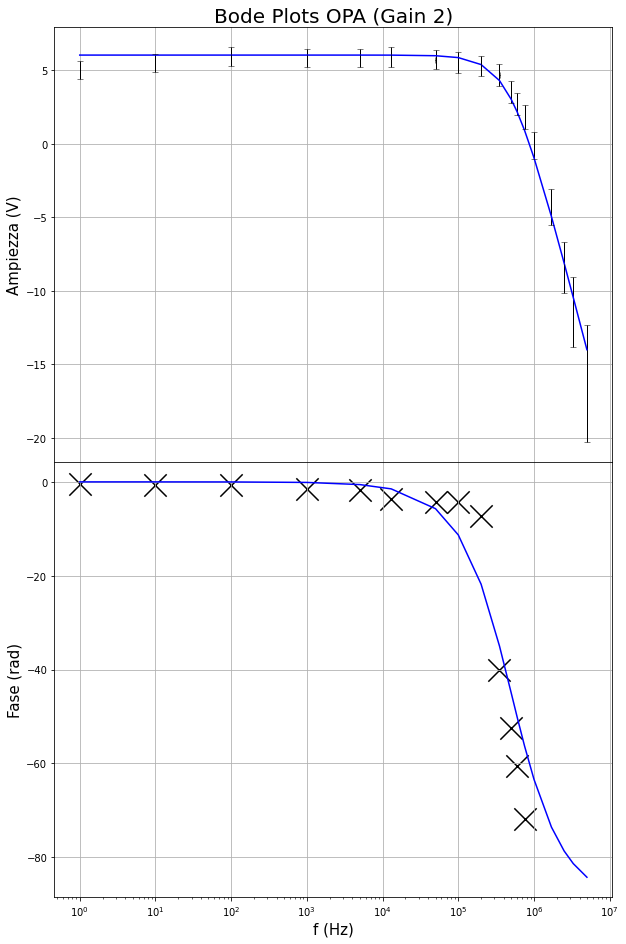

0      1.460
1      0.716
2      0.360
3      0.719
4      1.800
5      3.750
6      7.200
7      4.200
8      4.320
9     40.100
10    52.500
11    60.600
12    71.900
13    86.500
Name: fase, dtype: float64

In [313]:

G2=1+R2/R1
fH2=5.0*10**5

fH_2_err = 0.3*10**5
a=1/fH2
b=0
c=0


num = np.array([G2]) #zeros(increase 20 db)
den = np.array([a,1]) #poles (decreases 20 db) [1,a+b+c,ab+ca+cb,abc]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f, mag, phase = H.bode(df_data['f']) #df_data_n['f'] 

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag,color = "blue") # Magnitude Plot
plt.title('Bode Plots OPA (Gain 2)',fontsize=20)
plt.ylabel('Ampiezza (V)',fontsize=15)

plt.grid()
plt.errorbar( df_data['f'],db_gain_Arr ,xerr = df_errors['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 3)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Fase (rad)',fontsize=15)
plt.xlabel('f (Hz)',fontsize=15)
plt.semilogx(f, phase,color = "blue")

plt.subplot(212)
np.sort(fase_arr)
plt.scatter( df_data['f'][:-5],np.sort(fase_arr[:-5])*-1 ,marker='x', s = 500 ,  color='Black')

plt.grid()
plt.subplots_adjust(hspace=0)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain2(mag+phase).pdf")
plt.show()
fase_arr[:-4]

In [314]:
((mag-db_gain_Arr)**2).sum()

10.685717838924727

In [315]:
((mag-db_gain_Arr)**2).sum()

10.685717838924727

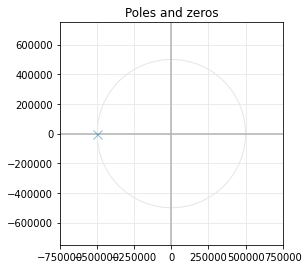

In [316]:
from scipy.signal import (freqz, butter, bessel, cheby1, cheby2, ellip, 
                              tf2zpk, zpk2tf, lfilter, buttap, bilinear, cheb2ord, cheb2ap
                              )
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
from collections import defaultdict
def zplane(z, p, filename=None):
    """Plot the complex z-plane given zeros and poles.
    """
    
    # get a figure/plot
    ax = plt.subplot(2, 2, 1)
    # TODO: should just inherit whatever subplot it's called in?

    # Add unit circle and zero axes    
    unit_circle = patches.Circle((0,0), radius=p, fill=False,
                                 color='black', ls='solid', alpha=0.1)
    ax.add_patch(unit_circle)
    axvline(0, color='0.7')
    axhline(0, color='0.7')
    
    # Plot the poles and set marker properties
    poles = plt.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
    
    # Plot the zeros and set marker properties
    zeros = plt.plot(z.real, z.imag,  'o', markersize=9, 
             color='none', alpha=0.5,
             markeredgecolor=poles[0].get_color(), # same color as poles
             )

    # Scale axes to fit
    r = 1.5 * np.amax(np.concatenate((abs(z), abs(p), [1])))
    plt.axis('scaled')
    plt.axis([-r, r, -r, r])
b= num
a = den

# Get the poles and zeros
z, p, k = tf2zpk(b, a)

# Create zero-pole plot
plt.figure(figsize=(16, 9))
zplane(z, p)
plt.grid(True, color='0.9', linestyle='-', which='both', axis='both')
plt.title('Poles and zeros')
t = np.linspace(0,400,1000)
a = 5*10**5
#plt.plot(a*np.sin(t),a*np.cos(t),color='r', linestyle= '-')


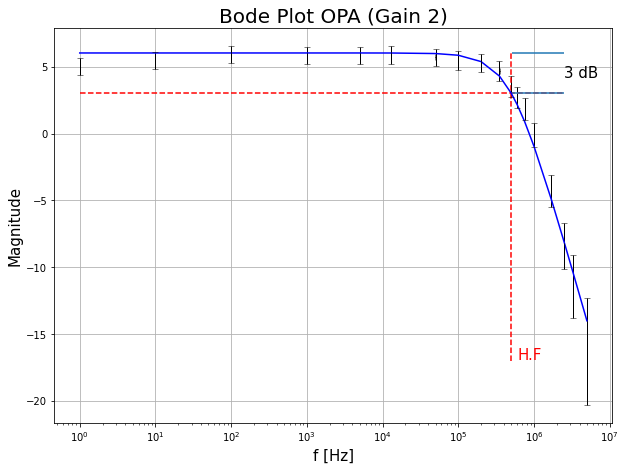

In [317]:
plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f, mag,color = "blue") # Magnitude Plot
plt.title('Bode Plot OPA (Gain 2)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar( df_data['f'],db_gain_Arr ,xerr = df_errors['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=0.5,errorevery=1, alpha=1, ms=0, capsize = 3)
plt.vlines(fH2, mag[len(mag)-1]-3,  mag[0], linestyles="--", color = "red")
plt.hlines(mag[0]-3,f[0],f[len(f)-3], linestyles="--", color = "red")
plt.text(fH2+100000, mag[len(mag)-1]-2, 'H.F', verticalalignment='top', horizontalalignment='left', color='red', fontsize=15)

max_in = mag[0]
max_rt=mag[0]-3
plt.hlines(max_in, fH2+10000, f[len(f)-3])
plt.hlines(max_rt, fH2+10000, f[len(f)-3])

plt.text(f[len(f)-3], max_rt + abs(max_rt - max_in) - 0.9, '3 dB',verticalalignment='top', horizontalalignment='left', color='black', fontsize=15)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain2(mag).pdf")






In [318]:
###Calcolo band width
mag_BW = mag - mag[27]
mag
#f[18]
#print(np.where(mag_BW>(mag_BW[0]/umath.sqrt(2)-0.5) and mag_BW>(mag_BW[0]/umath.sqrt(2)+0.5) ))
#print(np.where(mag_BW==45.60653209996797))
#f[np.where(mag_BW==45.60653209996797)]

IndexError: index 27 is out of bounds for axis 0 with size 18

In [20]:
-0.15804521-3
#(f[51]+f[52])/2

-3.15804521

In [21]:
###how to get bode plot

#num = np.array([1]) #zeros(increase 20 db)
#den = np.array([1/10**6,1]) #poles (decreases 20 db)
#H = signal.TransferFunction(num, den)
#print ('H(s) =', H)
#f, mag, phase = signal.bode(H)
#plt.figure()
#plt.semilogx(f, mag) # Magnitude Plot
#plt.grid()
#plt.figure()
#plt.semilogx(f, phase) # Phase plot
#plt.show()
#len(f)

# Gain 10

In [284]:
df_data = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_data.csv")
df_errors = pd.read_csv("../data-source/4-10-21/inverting_gain/inverting_gain_10_errors.csv")
df_tot = pd.
len(df_data)

29

### Convert to arrays of uncertainties

In [285]:
index=[27,28]
df_errors_n = df_errors.drop(index)
df_data_n = df_data.drop(index)
f_arr = pair_dat_err(df_data_n['f'], df_errors_n['f'])
ppch1_arr = pair_dat_err(df_data_n['PPch1'], df_errors_n['PPch1'])
ppch2_arr = pair_dat_err(df_data_n['PPch2'], df_errors_n['PPch2'])

### Calculate Gain

In [286]:
gains_arr = ppch2_arr / ppch1_arr
db_gains_arr = list(map(lambda x: 20 * umath.log10(x), gains_arr))


### Canvas

In [287]:
canvas = ROOT.TCanvas("c2", "bode gain 10", 1000, 500)

canvas.SetLogx(True)

### GraphErrors

In [288]:
#bode_graph_err = uncertainties_to_root_graph_errors(f_arr, gains_arr)
bode_graph_err = uncertainties_to_root_graph_errors(f_arr, db_gains_arr)

bode_graph_err.SetTitle("Bode Gain 10")
bode_graph_err.GetXaxis().SetTitle("f [Hz]")
bode_graph_err.GetYaxis().SetTitle("G [dB]")
bode_graph_err.SetMarkerStyle(21)
bode_graph_err.SetMarkerSize(0.4)

### Fit

In [289]:
A_v11_d = 20*umath.log10(1+R3/R1)
f_l11 = 1/np.sqrt(2)*(1+R3/R1)
print('guadagno calcolato = ',A_v11_d)
print('freq taglio = ',f_l11)

guadagno calcolato =  20.690773134416144
freq taglio =  7.656383151510266


In [290]:
function = "[1]*(1/sqrt(1+(x/[0])**2))"
fit_f11 = ROOT.TF1("fit1", function)
###parameter per low pass filter
fit_f11.SetParName(0, "f_l")
fit_f11.SetParName(1, "Gain")
fit_f.SetParameter(0, 10**5)
fit_f.SetParameter(1, A_v11_d)

fit_f.SetParLimits(1,A_v11_d-2,A_v11_d+2)
fit_f.SetParLimits(1,1,10**3)

### Draw Graph

 NEW MINIMUM FOUND.  GO BACK TO MINIMIZATION STEP.
                                                  V
                                                  V
                                                  V
                                               VVVVVVV
                                                VVVVV
                                                 VVV
                                                  V

 FCN=166.559 FROM MINOS     STATUS=SUCCESSFUL     14 CALLS         380 TOTAL
                     EDM=1.44406e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  f_l          1.33020e+05   5.91666e+03   2.27613e+01  -6.75316e-10
   2  Gain         1.98283e+01   1.49841e-01   1.49841e-01  -4.99078e-05


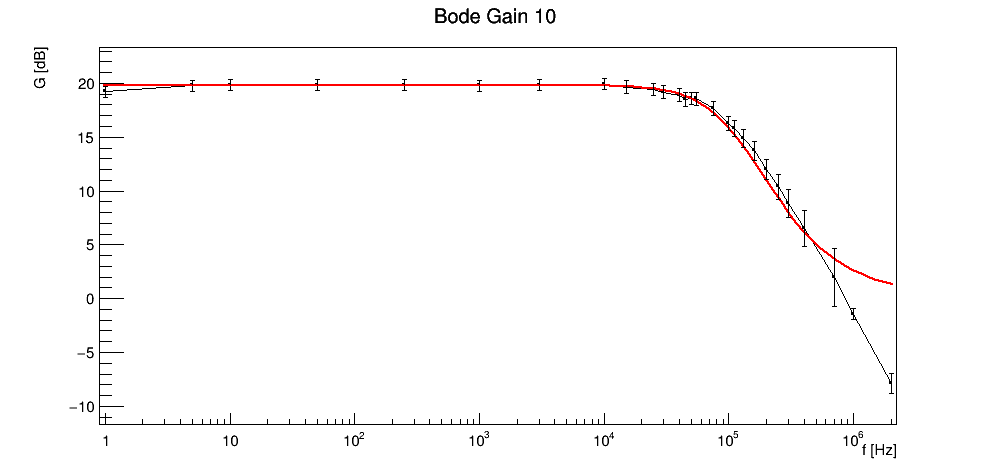

In [291]:
canvas.Draw()
bode_graph_err.Draw()
bode_graph_err.Fit(fit_f11, "MSE")


In [292]:
ppch1_Arr = df_data_n['PPch1']
ppch2_Arr = df_data_n['PPch2']
gain_Arr = ppch2_Arr/ppch1_Arr
db_gain_Arr = list(map(lambda x: 20 * umath.log10(x), gain_Arr))
#gain_Arr_errors = ((df_errors_n['PPch2']/ppch1_Arr)**2 + (ppch2_Arr/(ppch1_Arr)**2*df_errors_n['PPch1'])**2)  
#db_gain_Arr_errors = list(map(lambda x: 20 * umath.log(x), gain_Arr_errors))  
db_gain_Arr_errors =[0.49476812680433546,
 0.5140839532243918,
 0.5161766453566071,
 0.5161766453566071,
 0.5161766453566071,
 0.5140839532243918,
 0.5161766453566071,
 0.5183135430618956,
 0.5902223277479106,
 0.5722443540890254,
 0.6254940844308975,
 0.6034386533470738,
 0.6305511142668727,
 0.5537228015136225,
 0.6054252390733152,
 0.6505261427316407,
 0.6565350182110768,
 0.7298167274022264,
 0.8141018776433374,
 0.8943701715235557,
 0.9354989439512417,
 1.2036580608023484,
 1.2876413768877326,
 1.644168540308734,
 2.73562945708666,
 0.5320467589458894,
 0.9184136827732226]


# 6.714495099740892,
# 33.34952100333063
gain_Arr
R3/R1

9.827760891590678

H(s) = TransferFunctionContinuous(
array([846690.]),
array([1.00e+00, 8.35e+04]),
dt: None
)


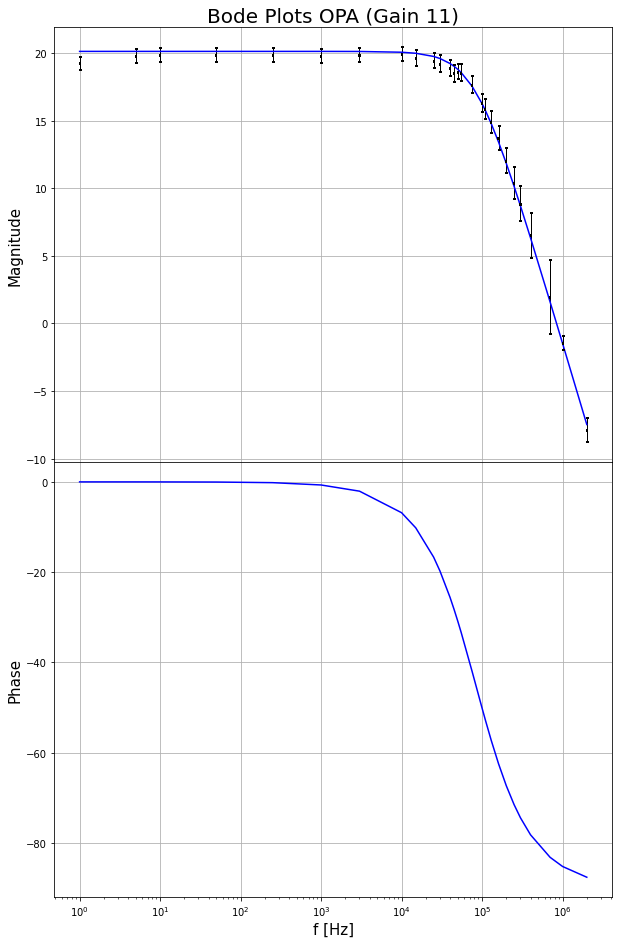

83500.0

In [294]:
#k=9.8**18
#a=0.4*10**5
#b=1.2*10**5
#c=3.5*10**5

G11=1+R3/R1
G11 = 10.14
fH11=8.35*10**4
fH_11_err = 0.45*10**4
a=1/fH11
b=0
c=0

num = np.array([G11-b]) #zeros(increase 20 db)
den = np.array([a,1]) #poles (decreases 20 db) [1,a+b+c,a*b+c*a+c*b,a*b*c]  (as+1)(bs+1)(cs+1)=(1+(a+b)s+abs^2)(cs+1)=(1+(a+b+c)s+(ab+c(a+b))s^2+abcs^3)
H = signal.TransferFunction(num, den)
print ('H(s) =', H)
f_11, mag_11, phase_11 = H.bode(df_data_n['f']) #

plt.figure(figsize=((10,16)))


ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11,color = "blue") # Magnitude Plot
plt.title('Bode Plots OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)

plt.grid()
plt.errorbar( df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors, fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.subplot(212, sharex = ax1)
plt.ylabel('Phase',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f_11, phase_11,color = "blue")
plt.grid()
plt.subplots_adjust(hspace=0)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag+phase).pdf")

plt.show()


fH11

In [56]:
mag_11-db_gain_Arr

array([ 0.61701945,  0.06715888, -0.00492366, -0.00492515, -0.00496252,
        0.06653605, -0.01052599, -0.13945582,  0.0657306 ,  0.04204975,
        0.11601979,  0.03503351,  0.24454863, -0.08274746, -0.27208188,
       -0.37766836, -0.31140748, -0.3615901 , -0.37485539, -0.58707207,
       -0.47679232, -0.51700763, -0.44038673, -0.46069344, -0.65269621,
       -0.3104017 ,  0.12788201])

In [57]:
mag_11-db_gain_Arr

array([ 0.61701945,  0.06715888, -0.00492366, -0.00492515, -0.00496252,
        0.06653605, -0.01052599, -0.13945582,  0.0657306 ,  0.04204975,
        0.11601979,  0.03503351,  0.24454863, -0.08274746, -0.27208188,
       -0.37766836, -0.31140748, -0.3615901 , -0.37485539, -0.58707207,
       -0.47679232, -0.51700763, -0.44038673, -0.46069344, -0.65269621,
       -0.3104017 ,  0.12788201])

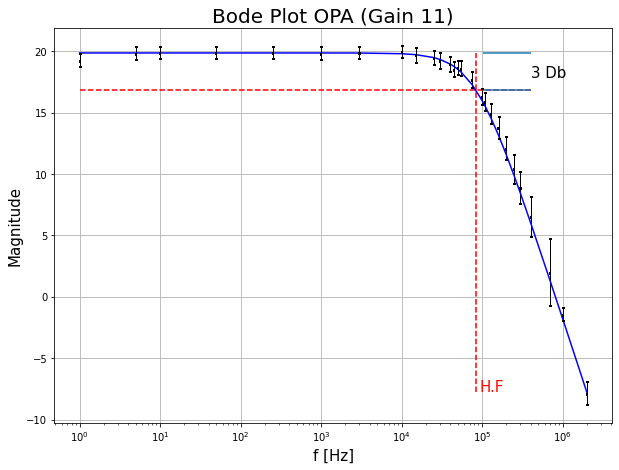

In [58]:
plt.figure(figsize=((10,16)))

ax1 = plt.subplot(211)
plt.semilogx(f_11, mag_11,color = "blue") # Magnitude Plot
plt.title('Bode Plot OPA (Gain 11)',fontsize=20)
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.grid()
plt.errorbar(df_data_n['f'],db_gain_Arr ,xerr = df_errors_n['f'],yerr = db_gain_Arr_errors , fmt='o', color='Black', elinewidth=1,capthick=2,errorevery=1, alpha=1, ms=0, capsize = 1.5)
plt.vlines(fH11, mag_11[len(mag_11)-1],  mag_11[0], linestyles="--", color = "red")
plt.hlines(mag_11[0]-3,f_11[0],f_11[23], linestyles="--", color = "red")

plt.text(fH11+10000, mag_11[len(mag_11)-1]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=15)

max_in = mag_11[0]
max_rt=mag_11[0]-3
plt.hlines(max_in, fH11+20000, f_11[23])
plt.hlines(max_rt, fH11+20000, f_11[23])

plt.text(f_11[23], max_rt + abs(max_rt - max_in) - 1, '3 Db',verticalalignment='top', horizontalalignment='left', color='black', fontsize=15)

plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain11(mag).pdf")

plt.show()



In [59]:

#f, mag, phase = H.bode() 
mag_BW = mag_11 - mag_11[26]
mag_11

array([19.84909163, 19.84909162, 19.84909157, 19.84909007, 19.8490527 ,
       19.84846879, 19.84348924, 19.7872451 , 19.71115526, 19.47625696,
       19.32183237, 18.95187286, 18.74172326, 18.51828962, 18.28401562,
       17.28006366, 15.98542694, 15.47880183, 14.5038876 , 13.15434355,
       11.56440751,  9.8647075 ,  8.41634642,  6.05637815,  1.31949975,
       -1.74735388, -7.74534221])

In [60]:
45.74330349-3
#mag_11[43]
#f_11[43]

42.74330349

In [61]:
mag_BW[24]
print(np.where(mag_BW==84.75575792647965))
f[np.where(mag_BW==84.75575792647965)]
f_11[19]

(array([], dtype=int64),)


160000

In [62]:
700000
(f[24]+f[25])/2

2750000.0

In [67]:
###Control BW*Gain
BG2 = fH2*(G2-1)
BG2_err = np.sqrt((fH_2_err*G2)**2+(fH2*G2_err)**2)
print(BG2, '+- ',BG2_err)

591793.3130699089 +-  81845.93753956899


In [64]:
BG11 = fH11*(G11-b)
BG11_err = np.sqrt((fH_11_err*G11)**2+(fH11*G11_err)**2)
print(BG11, '+- ',BG11_err)

820618.0344478217 +-  65020.388169485435


In [65]:
z_BG = abs(BG2-BG11)/np.sqrt(BG11_err**2 + BG2_err**2)
print(z_BG)
BG11*G11/G2

2.1890930804775866


4435986.309632711

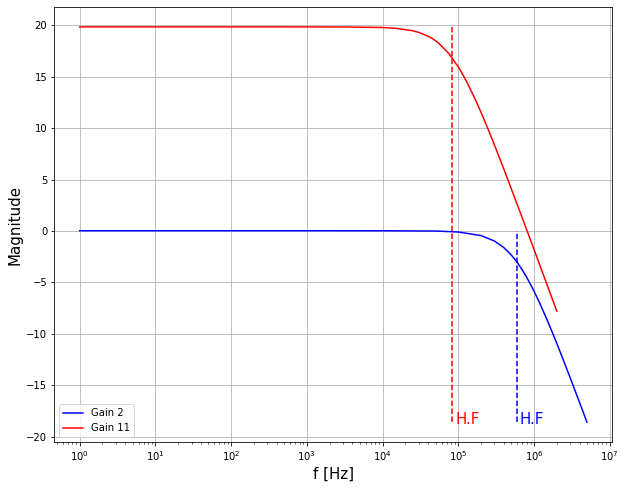

In [65]:
###plot gain 1 + gain 11
plt.figure(figsize=((10,8)))
plt.ylabel('Magnitude',fontsize=15)
plt.xlabel('f [Hz]',fontsize=15)
plt.semilogx(f, mag, label='Gain 2',color = "blue")
plt.semilogx(f_11, mag_11,label='Gain 11',color = "red")
plt.vlines(fH2, mag[27],  mag[0], linestyles="--", color = "blue")
plt.text(fH2+50000, mag[27]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='blue', fontsize=15)
plt.vlines(fH11, mag[27],  mag_11[0], linestyles="--", color = "red")
plt.text(fH11+10000, mag[27]+1, 'H.F',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=15)
plt.grid()
plt.legend(loc = "lower left")
plt.savefig(f"{OUTPUTDIR}/OPA-bode_gain_comparison(mag).pdf")
plt.show()
